# Module 22 - Linear Regression and Least Squares Fitting

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png" width=600px>

## Goals

- An introduction to the theory of curve fitting and least-squares analysis

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Least Squares Analysis 
Science is exceedingly becoming a *data rich* pursuit and modern experiments or simulations can easily produce terabytes of data.  Curve fitting or regression analysis is the simplest type of *data analysis*.

We begin by considering $N$ two dimensional data points:

$$\{(x_0,y_0),\ldots,(x_{N-1},y_{N-1})\} $$

and we want to fit this data to a continous function:

$$f(x;\vec{a})$$

where $\vec{a}$ is a vector of $m$ adjustable parameters that we want to determine such that our data **fits** the function.   

Intuitively, this means that our data points should fall *near* the curve $f$, we can quantify by defining the residual $r_i$ for each point:

\begin{equation}
r_i \equiv y_i - f(x_i;\vec{a}).
\end{equation}

Our approach will be to find $\vec{a}$ such that it minimizes the **squares** of these errors:  
\begin{equation}
s^2 = \sum_{i}^{N} r_i^2 = \sum_{i}^{N} \left[y_i - f(x_i;\vec{a}) \right]^2 .
\end{equation}
This is known as **least-squares fitting** and it was first used by Gauss to determine the orbits of the comets from observational data.

If there are uncertainties in the data such that $y_i \to y_i \pm \sigma_i$ then we need to modify this equation to place less emphasis on those data points with large error.  This defines the $\chi^2$ residual:

\begin{equation}
\chi^2 = \sum_{i}^{N} \left(\frac{r_i}{\sigma_i}\right)^2 = \sum_{i}^{N} \frac{1}{\sigma_i^2} \left[y_i - f(x_i;\vec{a}) \right]^2 .
\end{equation}

If we assume that the errors $\sigma_i$ are normally distributed, we can make concrete statistical statements about the goodness of fit.

## Linear Regression Through Least Squares Fitting

We can find the optimal set of parameters, $\vec{a}$, by minimizing the sum of the squared residuals, $s^2$ (assuming all the uncertainties are constant, i.e., $\sigma_i = \sigma\ \forall\ i,\ldots,N$). This can be accomplished by taking the derivative of $s^2$ with respect to each of the parameters in $\vec{a}$ and simultaneously finding the roots of all $m$ equations

\begin{align}
\frac{\partial s^2}{\partial a_0} &= 0 \\
\frac{\partial s^2}{\partial a_1} &= 0 \\
\vdots \\
\frac{\partial s^2}{\partial a_{m-1}} &= 0.
\end{align}

We can solve this problem analytically for a simple linear equation of the form

\begin{equation}
f(x_i;\vec{a}) = a_0 + a_1 x_i,
\end{equation}

where the residuals are

\begin{equation}
r_i = y_i - f(x_i;\vec{a}) = y_i - a_0 - a_1 x_i
\end{equation}

and the two simultaneous equations to be solved are

\begin{align}
\frac{\partial s^2}{\partial a_0} &= -2 \sum_i (y_i - a_0 - a_1 x_i) = 0\newline
\frac{\partial s^2}{\partial a_1} &= -2 \sum_i (y_i x_i - a_0 x_i - a_1 x_i^2) = 0 .
\end{align}

These two equations can be solved for the two unknowns, $a_0$ and $a_1$, to obtain

\begin{align}
a_0 &= \frac{\overline{\left( x^2 \right)} \overline{y} - \overline{x} \overline{\left( xy \right)}}{\overline{\left( x^2 \right)} - \overline{x}^2} \\
a_1 &= \frac{\overline{\left( xy \right)} - \left( \overline{x} \right) \left( \overline{y} \right)}{\overline{\left( x^2 \right)} - \overline{x}^2},
\end{align}

where $\overline{x} = \frac{\sum_i^N x_i}{N}$, $\overline{\left( x^2 \right)} = \frac{\sum_i^N x_i^2}{N}$, and $\overline{\left( xy \right)} = \frac{\sum_i^N x_i y_i}{N}$.

### Computing the uncertainty in $\vec{a}$

We can determine the uncertainty or error in our fit parameters using the following equations:

\begin{align}
S_{y|x}^2 &= \frac{\sum_{i}^{N} \left( y_i - f(x_i;\vec{a}) \right)^2}{N - 2} \\
S_{x}^2 &= \frac{\sum_{i}^{N} \left( x_i - \overline{x} \right)^2}{N - 1} \\
S_{a_0} &= \frac{\overline{x} S_{y|x}}{S_x \sqrt{N-1}} \\
S_{a_1} &= \frac{S_{y|x}}{S_x \sqrt{N-1}},
\end{align}

where $S_{y|x}^2$ is the estimator of the variance, $S_{x}^2$ is the sample variance in $x$, and $S_{a_0}$ and $S_{a_1}$ are the uncertainties in $a_0$ and $a_1$ respectively.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Create a function, `LinFit(x, y, f)`, that does a linear regression to a straight line using the formulas shown above. The first two inputs to `LinFit` should be an array for the $x$ values and an array for the $y$ values. The third input is a function, `f(x, a0, a1)`, that returns an array of $y$ values given an input $x$ array and the two parameters for a straight line.  Calculate the uncertainties in the fitted values as well as the $\chi^2$ goodness of fit in each case. Create another function called `residuals(x, y, f, a0, a1)` that returns the normalized residuals, $r_i = (y_i - f(x_i;\vec{a}))/y_i$ for a given set of data and fitted parameters. Test your linear fitting procedure by generating a straight line with random noise. The normalized residuals should be uniformly distributed around 0.
</div>

In [2]:
def f(x, a0, a1):
    return a0 + a1*x

def LinFit(x,y,f):
    xb = x.mean()
    yb = y.mean()
    xyb = np.mean(x*y)
    x2b = np.mean(x*x)
    N = len(x)
    a0 = (x2b*yb - xb*xyb)/(x2b - xb*xb)
    a1 = (xyb - xb*yb)/(x2b - xb*xb)
    chi2 = np.sum((y - f(x, a0, a1))**2)
    S2yx = chi2/(N-2)
    S2x = np.sum((x - xb)**2)/(N-1)
    Sa0 = xb*np.sqrt(S2yx)/(np.sqrt(S2x*(N-1)))
    Sa1 = np.sqrt(S2yx)/(np.sqrt(S2x*(N-1)))
    #Sa0 = np.sqrt(S2yx*x2b/(N*x2b-N*xb**2))
    #Sa1 = np.sqrt(S2yx/(N*x2b-N*xb**2))

    return a0, a1, Sa0, Sa1, chi2, S2yx

def residuals(x, y, f, a0, a1):
    return (y - f(x, a0, a1))/y

<IPython.core.display.Javascript object>


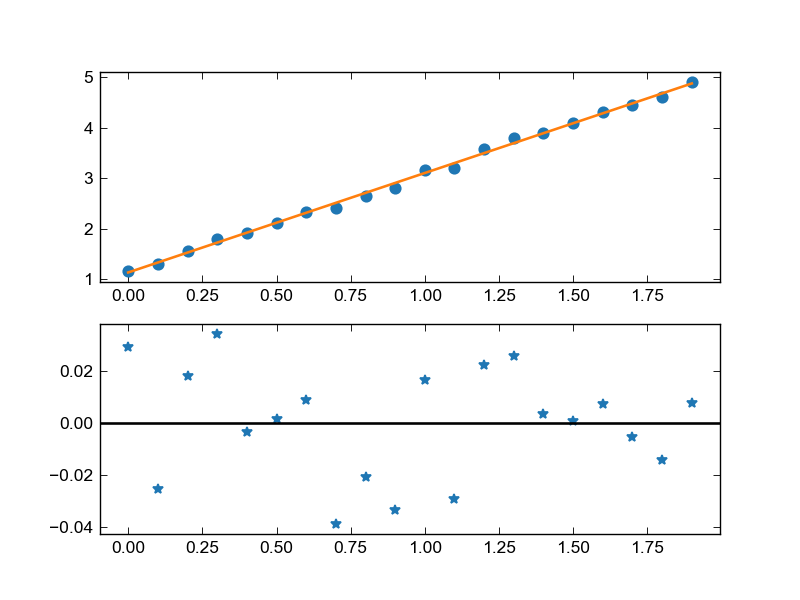

Fit parameters: a0 = 1.13 +/- 0.02, a1 = 1.97 +/- 0.02, Chi^2 =  0.063, Chi^2/DOF =  0.004


In [3]:
x = np.arange(0,2,0.1)
y = f(x,1,2) + 0.2*np.random.random(len(x))
a0,a1,Sa0,Sa1,chi2,S2yx = LinFit(x, y, f)
plt.figure()
plt.subplot(211)
plt.plot(x,y,'o')
plt.plot(x,f(x,a0,a1))
plt.subplot(212)
plt.plot(x,residuals(x,y,f,a0,a1),'*')
plt.axhline(y=0,color='k')
print("Fit parameters: a0 = {0:1.2f} +/- {1:1.2f}, a1 = {2:1.2f} +/- {3:1.2f}, Chi^2 = {4:6.3f}, Chi^2/DOF = {5:6.3f}".format(a0,Sa0,a1,Sa1,chi2,S2yx))

## Anscombe's quartet

It is important to note that fitting a curve to a given dataset does not in of itself produce anything meaningful.  One must carefully ask the question:

*What is the probability that the data, given their uncertainties, are described by the curve?*

This is the statistical science of hypothesis testing.  We will investigate a linear fit to a [special data set](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) that highlights the need to actually graph our data and consider the fit.

In [4]:
anscombe = np.array([[10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58],[8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76],
[13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],[9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
[11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],[14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
[6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],[4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
[12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],[7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
[5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.8]])
np.savetxt('anscombe_quartet.txt', anscombe, header='Anscombe\'s quartet\nx1\ty1\tx2\ty2\tx3\ty3\tx4\ty4', fmt='%6.2f')

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Use your functions above to fit the four datasets in Anscombe's data. Calculate the uncertainties in the fitted values as well as the $\chi^2$ goodness of fit in each case. Generate a set of plots the scattered points along with the linear fit, and a second set of plots that show the normalized residuals.
</div>

<IPython.core.display.Javascript object>


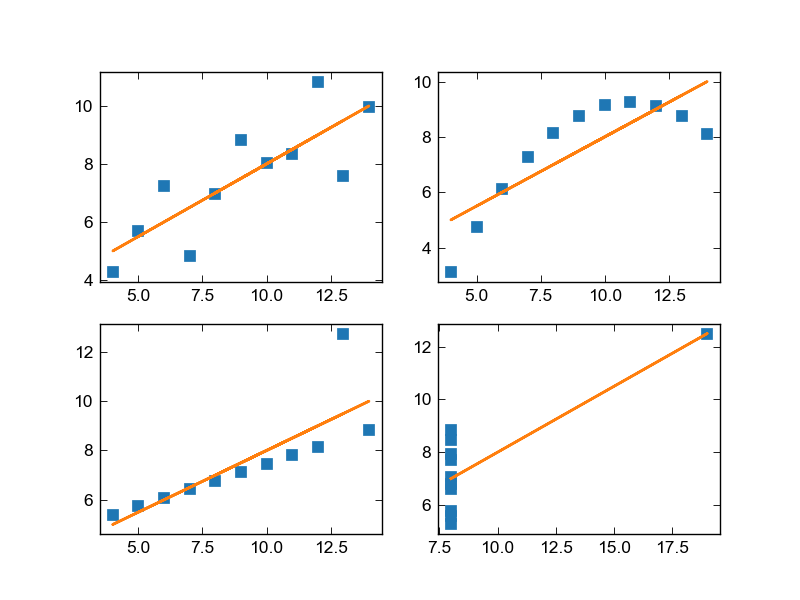

Anscombe dataset 1: a0 = 3.00 +/- 1.06, a1 = 0.50 +/- 0.12, Chi^2 = 13.76, Chi^2/DOF = 1.53
Anscombe dataset 1: a0 = 3.00 +/- 1.06, a1 = 0.50 +/- 0.12, Chi^2 = 13.78, Chi^2/DOF = 1.53
Anscombe dataset 1: a0 = 3.00 +/- 1.06, a1 = 0.50 +/- 0.12, Chi^2 = 13.76, Chi^2/DOF = 1.53
Anscombe dataset 1: a0 = 2.99 +/- 1.06, a1 = 0.50 +/- 0.12, Chi^2 = 13.77, Chi^2/DOF = 1.53


In [5]:
x = (0,2,4,6)
y = (1,3,5,7)
fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    a0,a1,Sa0,Sa1,chi2,S2yx = LinFit(anscombe[:,x[i]], anscombe[:,y[i]], f)
    print("Anscombe dataset 1: a0 = {0:1.2f} +/- {1:1.2f}, a1 = {2:1.2f} +/- {3:1.2f}, Chi^2 = {4:2.2f}, Chi^2/DOF = {5:2.2f}".format(a0,Sa0,a1,Sa1,chi2,S2yx))
    ax.plot(anscombe[:,x[i]], anscombe[:,y[i]], 's')
    ax.plot(anscombe[:,x[i]], f(anscombe[:,x[i]],a0,a1))

<IPython.core.display.Javascript object>


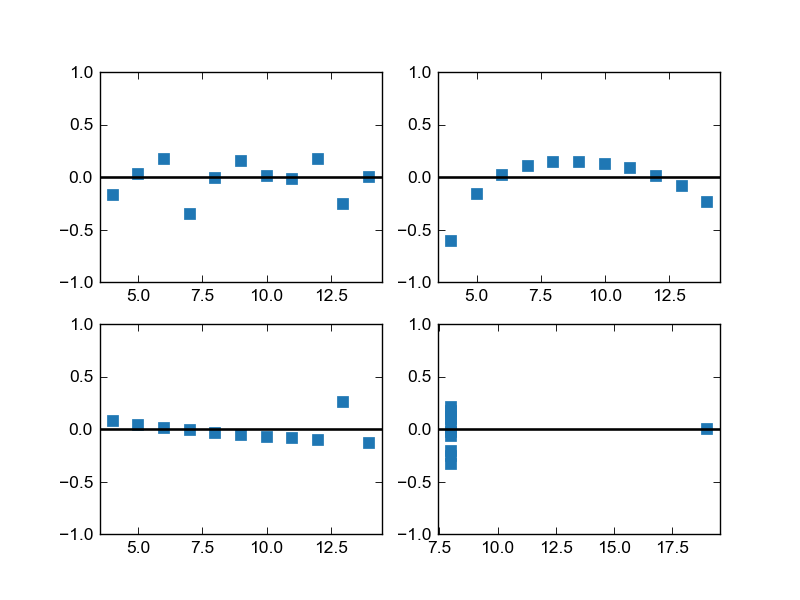

In [6]:
x = (0,2,4,6)
y = (1,3,5,7)
fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    a0,a1,Sa0,Sa1,chi2,S2yx = LinFit(anscombe[:,x[i]], anscombe[:,y[i]], f)
    ax.plot(anscombe[:,x[i]], residuals(anscombe[:,x[i]], anscombe[:,y[i]], f, a0, a1), 's')
    ax.axhline(0, color='k')
    ax.set_ylim(-1,1)


## Least-squares fitting to non-linear data

Some non-linear functions such as $y=a_0e^{a_1x}$ can be linearized, $\ln(y) = \ln(a_0) + a_1x$, and fitted using the linear regression method. However, care must be taken as this will produce different results than doing a non-linear least-squares regression to the original data.

In [7]:
def RadDecay(N0, tmax=4, dt=0.05, lambda1=1.0):
    t = np.arange(0, tmax, dt)     # array of discrete times
    N = np.ones_like(t, dtype=np.int64)           # array of number of particles at a given time
    N[0] = N0
    for i in range(len(t)-1):      # iterate over all discrete time steps
        nDecay = 0
        for n in range(N[i]):      # iterate over all the un-decayed particles at a given time
            R = np.random.random() # attempt for a single decay event
            if (R < lambda1*dt):   # if attempt is lower than P(t) = lambda*dt, then particle decays
                nDecay +=1
        N[i+1] = N[i] - nDecay
    return t, N

<IPython.core.display.Javascript object>


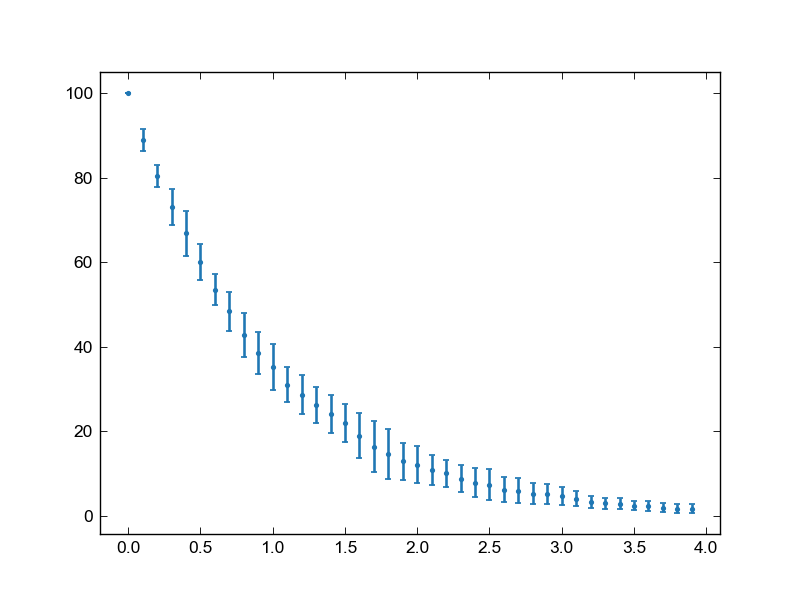

<Container object of 3 artists>

In [8]:
N_data = []
for i in range(10):
    t, N = RadDecay(100, dt=0.1)
    N_data.append(N)

N_data = np.array(N_data)
Nav = N_data.mean(axis=0)
Nstd = N_data.std(axis=0)
plt.figure()
plt.errorbar(t, Nav, yerr=Nstd, ls='', marker='o', ms=2, capsize=2)
#plt.plot(t, N[:])

a0 = 4.61 +/- 0.01, a1 = -1.05 +/- 0.01, Chi^2 = 0.06, Chi^2/DOF = 0.00


<IPython.core.display.Javascript object>


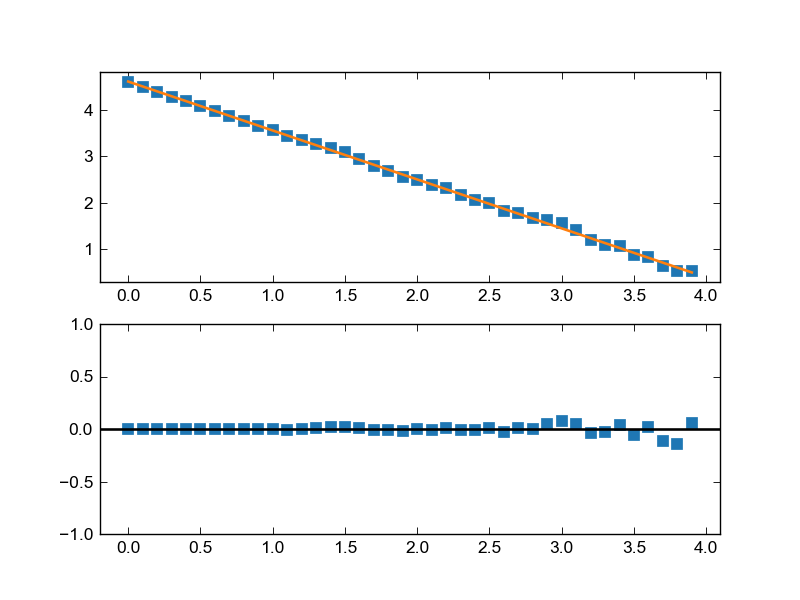

(-1, 1)

In [9]:
a0,a1,Sa0,Sa1,chi2,S2yx = LinFit(t, np.log(Nav), f)
print("a0 = {0:1.2f} +/- {1:1.2f}, a1 = {2:1.2f} +/- {3:1.2f}, Chi^2 = {4:2.2f}, Chi^2/DOF = {5:2.2f}".format(a0,Sa0,a1,Sa1,chi2,S2yx))
plt.figure()
plt.subplot(211)
plt.plot(t, np.log(Nav), 's')
plt.plot(t, f(t,a0,a1))
plt.subplot(212)
plt.plot(t, residuals(t, np.log(Nav), f, a0, a1), 's')
plt.axhline(0, color='k')
plt.ylim(-1,1)

<IPython.core.display.Javascript object>


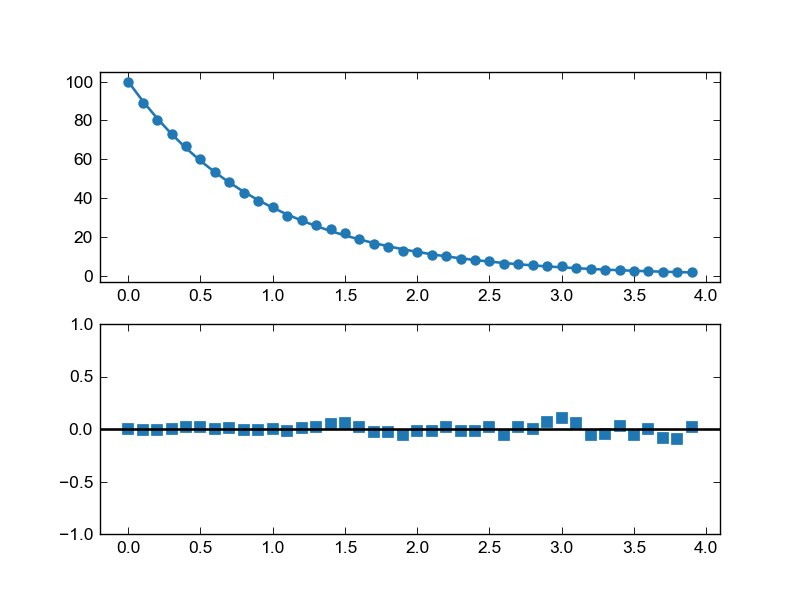

[ 99.99842425  -1.04878832]
4.60515442835
[[  2.17224798e-04  -1.95517942e-06]
 [ -1.95517942e-06   1.30796408e-05]]


In [10]:
from scipy.optimize import curve_fit

def exp_func(x,*a):
    '''exponential function'''
    return a[0]*np.exp(a[1]*x)


# perform the fits
Nstd[0] = 0.1
a1,a1_cov = curve_fit(exp_func,t,Nav,sigma=Nstd, p0=(1,1))

# plot the data
plt.figure()
plt.subplot(211)
plt.plot(t, Nav,'o',mfc=colors[0], mec='None',label='set 1')
plt.plot(t,exp_func(t,*a1), color=colors[0], linewidth=1.5, zorder=0, label = 'set 1 fit')
plt.subplot(212)
plt.plot(t, residuals(t, Nav, exp_func, a1[0], a1[1]), 's')
plt.axhline(0, color='k')
plt.ylim(-1,1)
print(a1)
print(np.log(a1[0]))
print(a1_cov)